## 常微分方程

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}
$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where \(r = 0.5 m\)

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:


$$h^{n+1}=h^n+\Delta t v^n$$

$$v^{n+1}=v^n+\Delta t \dfrac{-(m_s+m^n)g-\frac{1}{2}\rho v|v|AC_D+v_e\dot{m_p})}{m_s+m^n}$$

$$m^{n+1}=m^n-\Delta t \dot{m_p}$$

$$u=\begin{pmatrix}
     h\\
     v\\
     m\\
     \end{pmatrix}$$
     
$$f(u)=\begin{pmatrix}
     v \\
     \dfrac{-(m_s+m)g-\frac{1}{2}\rho v|v|AC_D+v_e\dot{m_p})}{m_s+m} \\
     \dot{m_p} \\
     \end{pmatrix}
$$

$$u_t=f(u)$$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
ms=50
g=9.81
rho=1.091
A=numpy.pi*0.5**2
ve=325
cd=0.15
mp0=100
mp=20                         
dt = 0.1      
features=3
T = 5
N = int(T/dt) + 1 

In [47]:
def f(u):

    h = u[0]
    v = u[1]
    m = u[2]
    return numpy.array([v,
                      (-(ms+m)*g-0.5*rho*v**2*A*cd+ve*mp)/(ms+m),
                      -mp,
                     ])
def f2(u):

    h = u[0]
    v = u[1]
    m = u[2]
    return numpy.array([v,
                      (-ms*g-0.5*rho*v**2*A*cd)/(ms),
                      0,
                     ])
def euler_step(u, f, dt):
    return u + dt * f(u)

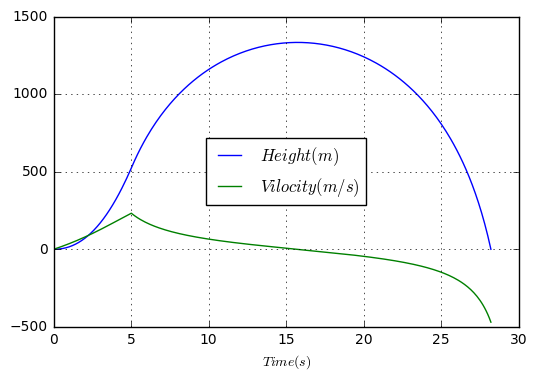

In [37]:
u = numpy.empty((N, features))
u[0] = numpy.array([0,0,mp0])
# time loop - Euler method
for n in range(N-1):
    if dt*n<5.0:
        u[n+1] = euler_step(u[n], f, dt)
    else:
        u[n+1] = euler_step(u[n], f2, dt)
plt.plot(np.linspace(0,T,N),u[:,0],label="$Height(m)$")
plt.plot(np.linspace(0,T,N),u[:,1],label="$Vilocity(m/s)$")
plt.legend(loc="center")
plt.grid(True)
plt.xlabel("$Time(s)$")

Euler方法是一阶精度的方法，为了获得高精度，可用半点显式差分方法，先计算$n$时间点加半时间点的函数值，再用半点处导数代替初始点的导数。

**2-nd Order Runge-Kutta**:

\begin{align}
u_{n+1/2}   & = u_n + \frac{\Delta t}{2} f(u_n) \\
u_{n+1} & = u_n + \Delta t \,\, f(u_{n+1/2}).
\end{align}

In [48]:
def rk2_step(u, f, dt):

    u_star = u + 0.5*dt*f(u)
    return u + dt*f(u_star)
for n in range(N-1):
    if dt*n<5.0:
        u[n+1] = rk2_step(u[n], f, dt)
    else:
        u[n+1] = rk2_step(u[n], f2, dt)

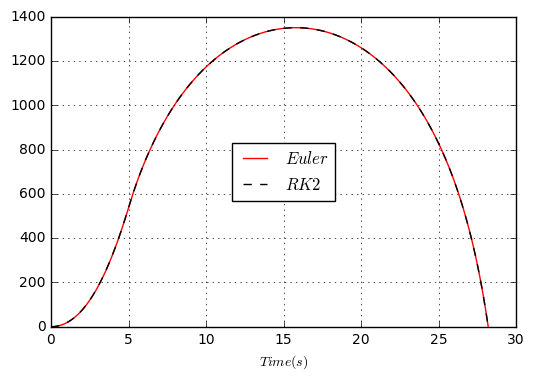

In [43]:
u_euler = numpy.empty((N, features))
u_rk2   = numpy.empty((N, features))


# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([0,0,mp0])
u_rk2[0]   = numpy.array([0,0,mp0])


# use a for loop to call the function rk2_step()
for n in range(N-1):
    if dt*n<5.0:
        u_euler[n+1] = euler_step(u[n], f, dt)
        u_rk2[n+1] = rk2_step(u_rk2[n], f, dt)
    else:
        u_euler[n+1] = euler_step(u[n], f2, dt)
        u_rk2[n+1]   = rk2_step(u_rk2[n], f2, dt)
plt.plot(numpy.linspace(0,T,N),u_euler[:,0],'r-',label="$Euler$")
plt.plot(numpy.linspace(0,T,N),u_rk2[:,0],'k--',label="$RK2$")
plt.legend(loc="center")
plt.grid(True)
plt.xlabel("$Time(s)$")

有时可以用中心差分(LeapFrog Method)进行近似（具有二阶精度）。

$$u'(t) \approx \frac{u_{n+1} - u_{n-1}}{2\Delta t}$$

$$u_{n+1} = u_{n-1} + 2\Delta t \, f(u_n)
$$

In [49]:
#暂定为非分段函数
def leapfrog_step(unm1, u, f, dt):
# unm1 is the result of n-1-th step
# u is the n-th step
    return unm1 + 2.0*dt*f(u)

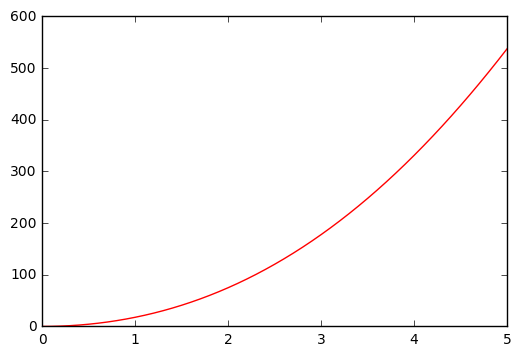

In [53]:
u_leapfrog = numpy.empty((N, features))

# initialize the array containing the solution for each time-step
u_leapfrog[0] = numpy.array([0,0,mp0])

# Caution:first step using RK2
u_leapfrog[1] = rk2_step(u_leapfrog[0], f, dt)
for n in range(1,N-1):
    if dt*n<5.0:
        u_leapfrog[n+1] = leapfrog_step(u_leapfrog[n-1], u_leapfrog[n], f, dt)
    else:
        u_leapfrog[n+1] = leapfrog_step(u_leapfrog[n-1], u_leapfrog[n], f2, dt)
plt.plot(numpy.linspace(0,T,N),u_leapfrog[:,0],'r-',label="$Center-diff$")

## 偏微分方程

1-D 线性对流：

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

$$u(x,0)=u_0(x)$$

特解：

$$u(x,t)=u_0(x-ct)$$

$n$代表离散时间，$i$代表离散空间点：
\begin{matrix} & &\bullet & & \bullet & & \bullet \\ & &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\ & &\bullet & & \bullet & & \bullet \\ & &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\ & &\bullet & & \bullet & & \bullet \\ & &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\ \end{matrix}

离散化：

•Forward difference: uses $x_i$ and $x_i + \Delta x$,

•Backward difference: uses $x_i$ and $x_i- \Delta x$,

•Central difference: uses two points on either side of $x_i$.


\begin{eqnarray} \frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_i)}{\Delta x} \quad\text{Forward}\\ \frac{\partial u}{\partial x} & \approx & \frac{u(x_i)-u(x_{i-1})}{\Delta x} \quad\text{Backward}\\ \frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_{i-1})}{2\Delta x} \quad\text{Central} \end{eqnarray}

为保证解的稳定性：

\begin{equation}\sigma = \frac{c \Delta t}{\Delta x} \leq 1 
\end{equation}

 波速为负值时，后向差分不稳定。
 波速为正值时，前向差分不稳定。

### 后向差分(*FTBS*)

(-0.5, 0.5)

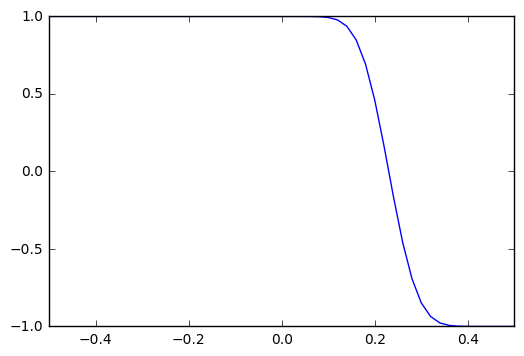

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
L=2.0
nx=101
dx=L/(nx-1)
dt=0.5*dx
nt=25
x=np.linspace(-1,1,nx)
u=np.ones(nx)
u[np.where(x>=0)]=-1
un=np.ones(nx)
un[np.where(x>=0)]=-1
plt.plot()
for n in range(1,nt): 
    un = u.copy() 
    u[1:] = un[1:]-dt/dx*(un[1:]-un[:-1])
plt.plot(x,u)
plt.xlim(-0.5,0.5)

### 中心差分(*FTCS*)

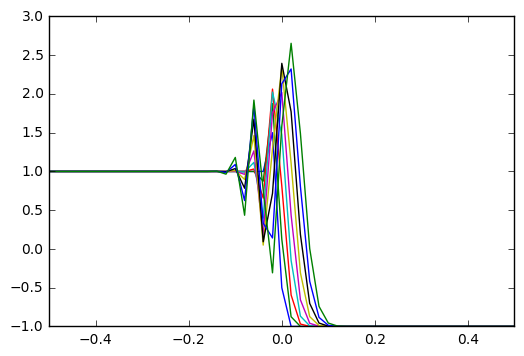

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
L=2.0
nx=101
dx=L/(nx-1)
dt=0.5*dx
nt=10
x=np.linspace(-1,1,nx)
u=np.ones(nx)
u[np.where(x>=0)]=-1
un=np.ones(nx)
un[np.where(x>=0)]=-1
for n in range(1,nt): 
    un = u.copy() 
    u[1:-1] = un[1:-1]-dt/(2*dx)*(un[2:]-un[:-2])
    plt.plot(x,u)
    plt.xlim(-0.5,0.5)

### 交通流传播问题

Consider the flow of traffic on a one-lane highway.  How can we describe the general behavior of this system?

We can define the speed of traffic, $V$ , in kilometers per hour.  We can also define a traffic density, the number of cars per unit length of highway, $\rho$ , in cars per kilometer.  Finally, we can define a traffic flux, or the flow rate of cars, $F$  in cars per hour.  

Now make a few assumptions about how traffic moves.  

If $\rho$  approaches 0, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_ {max}$ .  

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $ρ_{max}$   and $V$  approaches $0$.

One possible equation to describe this behavior is

$$V = V_{max} \left(1 - \frac{\rho}{\rho_{max}} \right)$$

If we describe the traffic flux, $F$  as

$$F = V\rho$$

$$F = F(\rho) = V(\rho)\rho = V_{max} \rho \left(1 - \frac{\rho}{\rho_{max}} \right)$$

Unsteady traffic flow can be modelled as the non-linear convection of car density, so we apply the non-linear convection equation with $V$ , the wave speed, equal to $\frac{\partial F}{\partial\rho}$ :

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0$$

Applying the chain rule of calculus, this becomes

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$$

Discretize the traffic flow equation using forward-difference in time and backward-difference in space.  

**Examine a stretch of road 11 kilometers long using the following conditions:**

$$V_{max} = 80 \frac{\text{km}}{\text{hr}}\quad\quad L = 11 \text{ km}\quad\quad\rho_{max} = 250 \frac{\text{cars}}{\text{km}}\quad\quad nx = 51$$

$$\Delta t = .001 \text{ hours}\quad\quad\rho(0,t)=10$$

Discretization:

$$\frac{\partial\rho}{\partial t}\approx \frac{\rho_{i}^{n+1}-\rho_{i}^{n}}{\Delta t}$$

$$\frac{\partial F}{\partial x}\approx \frac{F_{i}^n-F_{i-1}^n}{\Delta x}$$

$$F_i^n=V_{max} \rho_i^n \left(1 - \frac{\rho_i^n}{\rho_{max}} \right)$$

$$\rho_{i}^{n+1}=\frac{\Delta t}{\Delta x}(F_{i-1}^{n}-F_i^n)+\rho_i^n$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

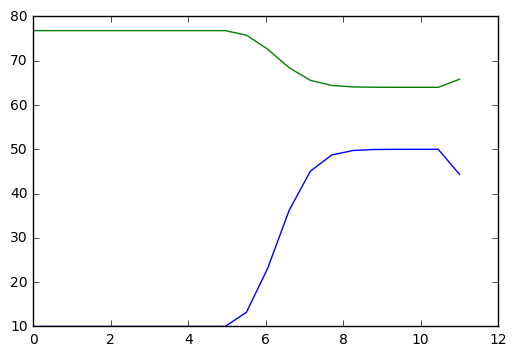

In [27]:
L=11.0
Vm=80.0
rhom=250
nx=21
dt=0.001
x = np.linspace(0,L,nx)
dx=L/(nx-1)
rho0 = np.ones(nx)*10
rho0[10:20] = 50
F=rho0*Vm*(1-rho0/rhom)
nt=20
for n in range(1,nt): 
    rhoi = rho0.copy() 
    F=rhoi*Vm*(1-rhoi/rhom)
    rho0[1:] = rhoi[1:]-dt/dx*(F[1:]-F[:-1]) #array相减
plt.plot(np.linspace(0,L,nx),rho0)
plt.plot(np.linspace(0,L,nx),Vm*(1-rho0/rhom))
#for n in range(1, nt):  
#   rhoi = rho0.copy()#按照时间更新当前的函数值
 #   for i in range(1,nx):
#      F[i]=rhoi[i]*Vm*(1-rhoi[i]/rhom)
   #     rho0[i] = rhoi[i]-dt/dx*(F[i]-F[i-1])#递推关系

### 扩散方程

\begin{equation}\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}\end{equation}

如果对二阶导数项离散，则有：

$$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u}{\partial x^2}\big|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)$$

$$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u}{\partial x^2}\big|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)
$$

则：

$$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\big|_i + {\mathcal O}(\Delta x^4)$$

即：

$$\begin{equation}\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + {\mathcal O}(\Delta x^2)\end{equation}
$$

至此我们获得了扩散方程的离散形式：

$$\begin{equation}\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}\end{equation}
$$

递推关系：

$$\begin{equation}u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})\end{equation}
$$

稳定性条件：

$$\begin{equation}
\nu \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}
$$

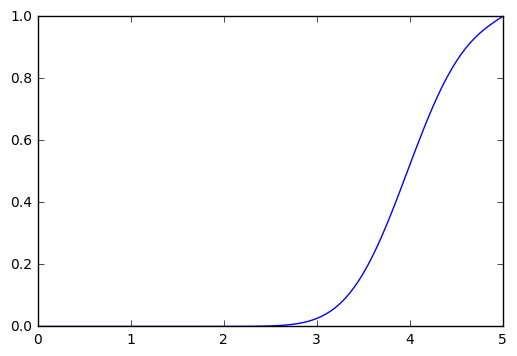

In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
def diffusion(un):
    return un[1:-1]+nu*dt/(dx**2)*(un[2:]-2*un[1:-1]+un[0:-2])
nu=0.1
L=5.0
nx=101
dx=L/(nx-1)
dt=dx**2*0.5/(nu*10)
nt=1001
x = np.linspace(0,L,nx)
u=np.zeros(nx)
u[np.where(x>=4)]=1
un=np.zeros(nx)
for t in range(nt):
    un=u.copy()
    u[1:-1]=diffusion(un)
plt.plot(x,u)

### 对流精度和稳定性

前向后向差分为一阶精度，耗散程度大，引入中心差分，但中心差分不稳定。

**Lax-Friedrichs scheme**：
$$\frac{u_i^{n+1}-\frac{1}{2}(u^n_{i+1}+u^n_{i-1})}{\Delta t} = -\frac{u^n_{i+1}-u^n_{i-1}}{2 \Delta x}$$

$$u_i^{n+1} = \frac{1}{2}(u^n_{i+1}+u^n_{i-1}) - \frac{\Delta t}{2 \Delta x}(u^n_{i+1}-u^n_{i-1})$$

例如：$$u(x,0)=\bigg \{
\begin{align}
1,x\in[-1,0]\\
-1,x\in[0,1]\\
\end{align}$$




(-1, 1)

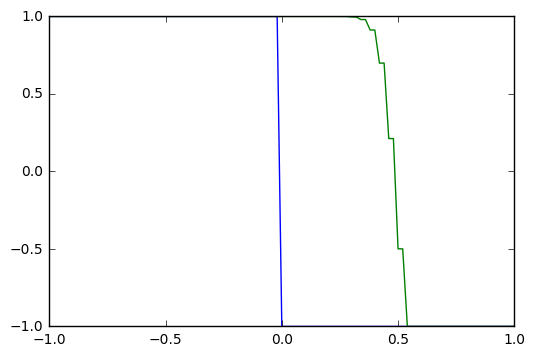

In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
L=2.0
nx=101
dx=L/(nx-1)
dt=0.9*dx
nt=28
x=np.linspace(-1,1,nx)
u=np.ones(nx)
u[np.where(x>=0)]=-1
un=np.ones(nx)
un[np.where(x>=0)]=-1
plt.plot(x,u)
for n in range(1,nt): 
    un = u.copy() 
    u[1:-1] = 1/2.0*(un[2:]+un[:-2])-dt/(2*dx)*(un[2:]-un[:-2])
    u[0]=un[0]
    u[-1]=un[-1]
plt.plot(x,u)
plt.xlim(-1,1)

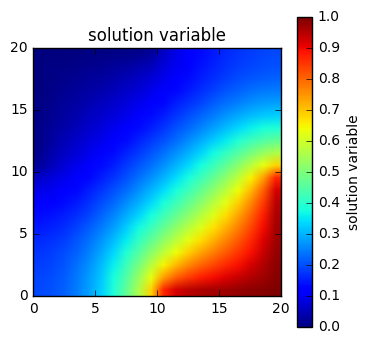

In [1]:
from fipy import *
%matplotlib inline
nx = 20
ny = nx
dx = 1.
dy = dx
L = dx * nx
mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)
phi = CellVariable(name = "solution variable",
                  mesh = mesh,
                   value = 0.)
D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)
valueTopLeft = 0
valueBottomRight = 1
X, Y = mesh.faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > L / 2))
                 | (mesh.facesTop & (X < L / 2)))
facesBottomRight = ((mesh.facesRight & (Y < L / 2))
                    | (mesh.facesBottom & (X > L / 2)))                  
phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=0., datamax=1.)
    viewer.plot()
timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 10
for step in range(steps):
    eq.solve(var=phi,
              dt=timeStepDuration)
    if __name__ == '__main__':
        viewer.plot()

## 线性方程组的迭代解法

对于线性方程组$Ax=b$，可以有分解$A=S-T$($S$必须便于求逆)，于是：

$$x_{k+1}=S^{-1}Tx_k+S^{-1}b$$

相对于$x$真值的误差:

$$e_{k+1}=S^{-1}Te_k$$

为使迭代相当次数后误差为零，应该满足谱半径$\rho$小于一：

$$\rho(S^{-1}T)=\max_i|\lambda_i|< 1$$

### 方程组的*Jacobi*迭代法

当$A$的分解为$A=D-L-U$时，有如下迭代格式：

$$x_{k+1}=D^{-1}(L+U)x_k+D^{-1}b$$

函数如下：

In [6]:
import numpy as np

A=np.matrix([[2,-1],[-1,2]])
b=np.matrix([[1],[1]])
x=np.matrix([[3],[3]])
def Jacobi(A,b,x,n):
    S=np.matrix(np.diag(np.diagonal(A)))
    T=S-A
    for i in range(n):
        x=S.I*T*x+S.I*b
    return x
Jacobi(A,b,x,10)

### 方程组的*Gauss-Seidel*迭代法(对角元均正时仅有正定矩阵收敛)

当$A$的分解为$A=L+U$时(一般产生的$S^{-1}T$矩阵的特征值更小)，有如下迭代格式：

$$Ax=\begin{bmatrix}
a_{11}&a_{12}&\cdots&a_{1n}\\
a_{21}&a_{22}&\cdots&a_{2n}\\
\cdots&\cdots&\cdots&\cdots\\
a_{n1}&a_{n2}&\cdots&a_{nn}\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
\cdots\\
x_n\\
\end{bmatrix}
=
\begin{bmatrix}
b_1\\
b_2\\
\cdots\\
b_n\\
\end{bmatrix}
$$

$$a_{11}(x_1)_{k+1}=(-a_{12}x_2-a_{13}x_3-\cdots -a_{1n}x_n)_k+b_1$$

$$a_{22}(x_2)_{k+1}=-a_{21}(x_1)_{k+1}+(-a_{23}x_3-\cdots -a_{2n}x_n)_k+b_2$$

$$a_{nn}(x_n)_{k+1}=(-a_{n1}x_1-a_{n2}x_2-\cdots -a_{nn-1}x_{n-1})_{k+1}+b_n$$

$$x_i^{k+1}=\frac{1}{a_{ii}}\bigg(b_i-\sum_{j=1}^{i-1}a_{ij}x_j^{k+1}-\sum_{j=i+1}^{n}a_{ij}x_j^{k}\bigg)$$

即：

$$
\begin{bmatrix}
a_{11}&0&\cdots&0\\
a_{21}&a_{22}&\cdots&0\\
\cdots&\cdots&\cdots&\cdots\\
a_{n1}&a_{n2}&\cdots&a_{nn}\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
\cdots\\
x_n\\
\end{bmatrix}_{k+1}=
\begin{bmatrix}
0&-a_{12}&\cdots&-a_{1n}\\
0&0&\cdots&-a_{2n}\\
\cdots&\cdots&\cdots&\cdots\\
0&0&\cdots&0\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
\cdots\\
x_n\\
\end{bmatrix}_{k}+
\begin{bmatrix}
b_1\\
b_2\\
\cdots\\
b_n\\
\end{bmatrix}
$$

In [1]:
import numpy as np

In [47]:
A=np.matrix([[2,-1],[-1,2]])
b=np.matrix([[1],[1]])
x=np.matrix([[2],[3]])
def Gauss(A,x,b,n):
    T=-np.linalg.linalg.triu(A,k=1)
    S=A+T
    for i in range(n):
        x=S.I*T*x+S.I*b
    return x

In [32]:
%%timeit
Jacobi(A,b,x,10)

100 loops, best of 3: 1.5 ms per loop


In [37]:
%%timeit
Gauss(A,b,x,10)

100 loops, best of 3: 1.5 ms per loop


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as tri
%matplotlib inline

N=10
A=np.tri(N,N,-2)-np.tri(N,N,1)+np.eye(N)*3
I=np.eye(N)
coef=np.kron(A,I)+np.kron(I,A)
f=np.hstack((np.ones(N)*30.0,np.zeros(N**2-N)))

Z=np.linalg.solve(coef,f)
X=np.arange(N)
Y=np.arange(N)
x,y=np.meshgrid(X,Y)
x,y=x.flatten(),y.flatten()
mesh=tri.Triangulation(x,y)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_trisurf(x,y,Z,triangles=mesh.triangles,cmap=plt.cm.rainbow)
ax.view_init(azim=10,elev=10)

In [3]:
import numpy as np

In [25]:
N = 84
A = np.eye(N, k = 1) + np.eye(N) * 6 + np.eye(N, k = -1) * 8
b = np.ones(N) * 15
b[0], b[-1] = 7, 14

In [27]:
from __future__ import division
def Gaussian_Elimination(A, b):
    # A: M by N matrix
    # b: N by 1 matrix
    M, N = A.shape
    x = np.zeros(N)
    Aug = np.column_stack((A,b))
    for col in range(N - 1):
        for row in range(col + 1, M):
            Aug[row] = Aug[row] - Aug[row, col] / Aug[col, col] * Aug[col]
    for row in range(M - 1, -1, -1):
        x[row] = (Aug[row, -1] - np.dot(Aug[row, :-1], x)) / Aug[row, row]
    return x



In [28]:
Gaussian_Elimination(A,b)

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         9.99999998e-01,   1.00000000e+00,   9.99999993e-01,
         1.00000001e+00,   9.99999970e-01,   1.00000006e+00,
         9.99999881e-01,   1.00000024e+00,   9.99999523e-01,
         1.00000095e+00,   9.99998093e-01,   1.00000381e+00,
         9.99992371e-01,   1.00001526e+00,   9.99969484e-01,
         1.00006103e+00,   9.99877937e-01,   1.00024413e+00,
         9.99511749e-01,   1.00097650e+00,   9.98046994e-01,
         1.00390601e+00,   9.92187977e-01,   1.01562405e+00,
         9.68751907e-01,

In [23]:
A = np.array([[2,1,1],[4,-6,0],[-2,7,2]])
b = np.array([5,-2,9])